## Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## Dataset Charecteristics:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


## Import Required Libraries


In [103]:
# importing the required necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To supress warnings
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset 

In [104]:
# loading the dataset that we are working on, in this case it is day.csv file
data = pd.read_csv("day.csv")
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [105]:
# shape of the dataset
data.shape

(730, 16)

In [106]:
# let's clearly see what we are working on
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [107]:
# observing the statistical info that we have on the given dataset
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [108]:
# finding out the information on datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Insights:
####  -> We can see that there are no missing values from the above cell, so we don't have much of data to clean, we find the unique vales present in each attribute and go for pre-processing the data

In [109]:
# finding out the unique values
data.apply(lambda x: len(x.unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## Data PrePocessing

In [110]:
# check for null values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Insights:
####  -> We can see that there are no null values from the above cell, so we have to look around the data and see if, in any case we can manipulate the data

#### -> for year, we have 'yr' as column heading, in the same we have other columns too, let's rename these column headings

In [111]:
data = data.rename(columns={'yr':'year',
                       'mnth':'month',
                       'weathersit':'weather',
                        'temp':'temperature',
                       'hum':'humidity',
                       'cnt':'count'})
data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [112]:
data.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

-----
# Exploratory Data Anlysis

## Data Visualisation

In [113]:
# creating new dataframe by removing uneccessary/extra columns and assigning new dataframe bike with remaining columns

bike_new = ['season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count']

bike = data[bike_new]
bike.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [114]:
bike.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [115]:
bike.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [116]:
bike.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [117]:
bike.weather.unique()

array([2, 1, 3], dtype=int64)

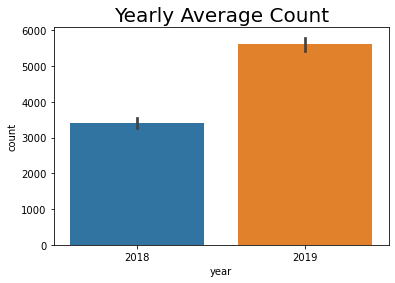

In [118]:
# mapping Year varible proper names for better visibilty

bike['year'] = bike['year'].map({0:'2018',1:'2019'})


# Visualising Yearly count of rented bikes

sns.barplot(bike['year'],bike['count'])
plt.title('Yearly Average Count', fontsize = 20)
plt.show()

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

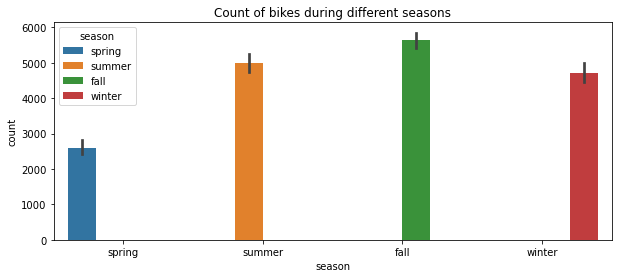

In [119]:
# mapping the characteristics for better visibilty
# season (1:spring, 2:summer, 3:fall, 4:winter)
bike['season'] = bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
# Visualising Seasons count of rented bikes

fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=bike, x='season', y='count', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

**Insights:**
- *In fall, there seems to be highest demand of rented the bikes, and then in Summer and later Winter*

[Text(0.5, 1.0, 'Count of bikes during different months')]

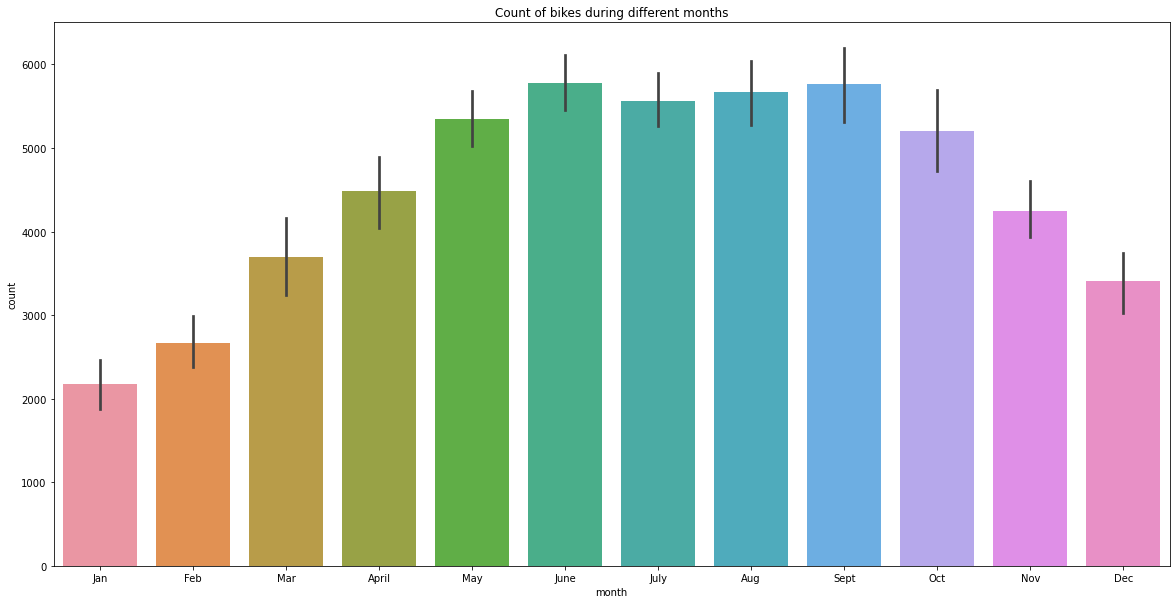

In [120]:
# mapping month for better visibilty

bike['month'] = bike['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})


# Visualising Monthly count of rented bikes

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=bike, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')

**Insights:**
- *Count of rented bikes in June, August, September, July followed by May, October. December, January, February have the least demand probably due to winter season*

[Text(0.5, 1.0, 'Count of bikes during different days')]

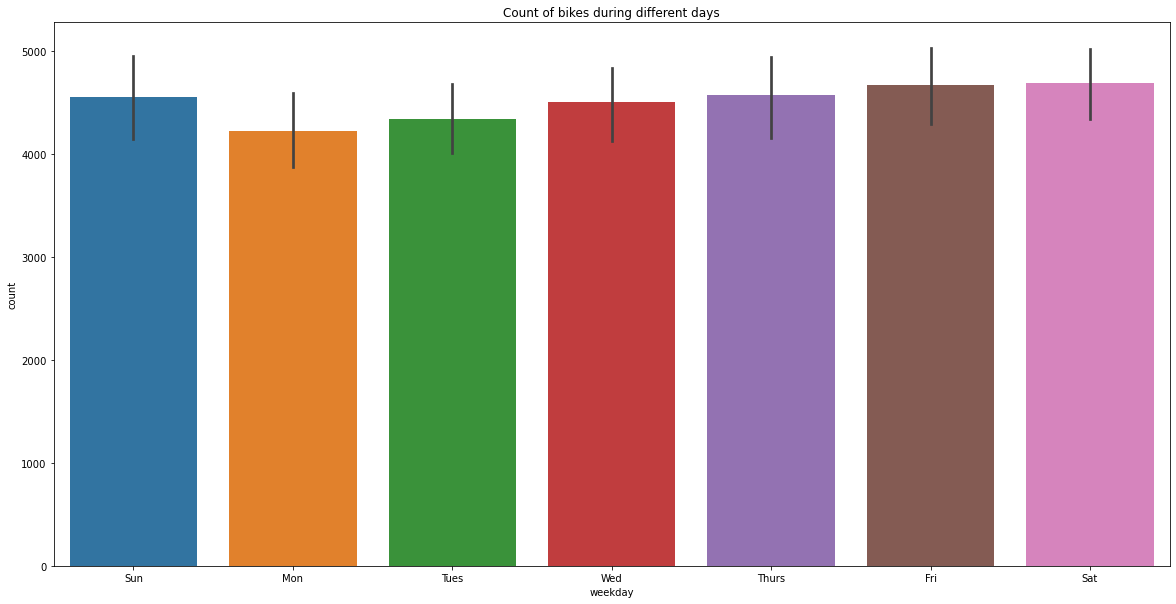

In [121]:
# mapping week days for better visibilty

bike['weekday'] = bike['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})

# Visualising Daily count of rented bikes

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=bike, x='weekday', y='count', ax=ax)
ax.set(title='Count of bikes during different days')

**Insights:**
- *All days have similar demands*

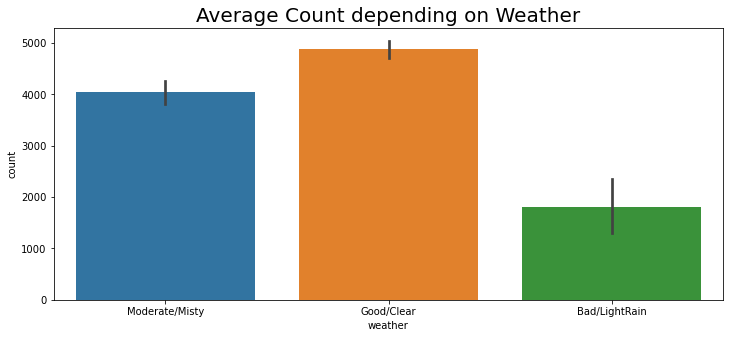

In [122]:
# mapping Weather charecteristics for better visibilty


bike['weather'] = bike['weather'].map({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',4:'Worse/HeavyRain'})


# Visualising Daily count of rented bikes

plt.figure(figsize=[12,5])
sns.barplot(bike['weather'],bike['count'])
plt.title('Average Count depending on Weather', fontsize = 20)
plt.show()

**Insights:**
- *It clearly shows that if the weather is clear, the demand is high*

[Text(0.5, 1.0, 'Relation between humidity and users')]

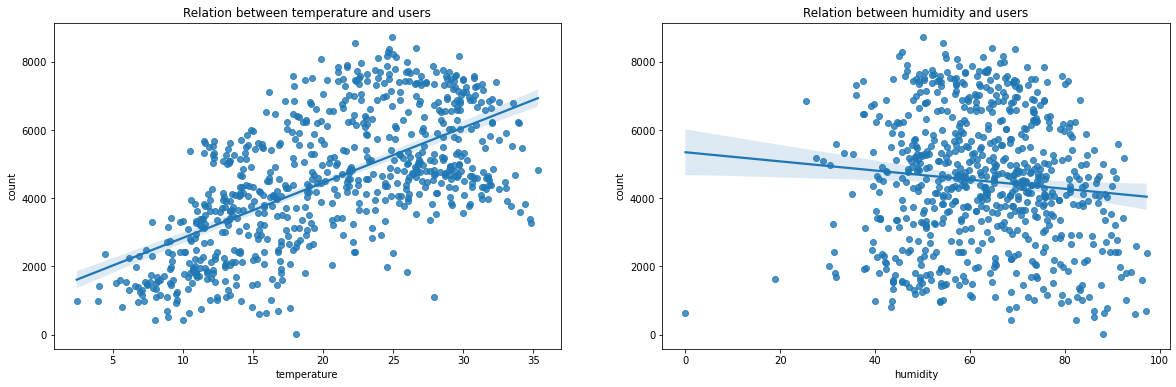

In [123]:
# visualising the realtion between users with temperature and humidity
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=bike['temperature'], y=bike['count'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=bike['humidity'], y=bike['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

**Insights:**
- *We can see that a straight line passes in between the data*

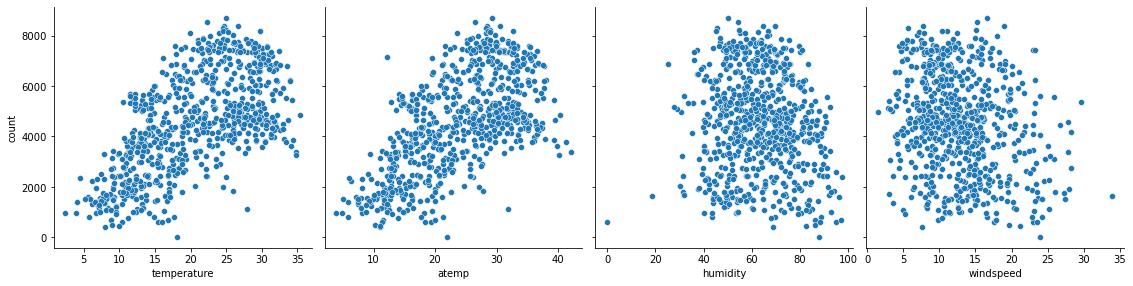

In [124]:
# visualising a scatter plot for temperature, atemp, humidity, windspeed
sns.pairplot(bike, x_vars=['temperature','atemp','humidity','windspeed'], y_vars='count',size=4, aspect=1, kind='scatter', diag_kind = None)
plt.show()

**Insights:**
- *From the plots we can say that we can perrform linear Regression*

## Correlation

<AxesSubplot:>

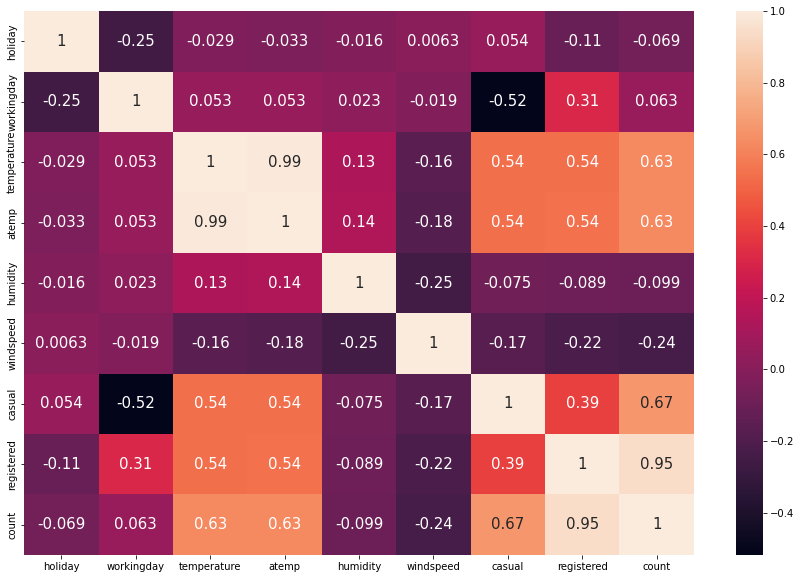

In [125]:
corr = bike.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

## Preparing the data using One Hot Encoding

In [126]:
# creating a list and putting all category columns in to it and converting them to category data type

categorial = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']

for i in categorial:
    bike[i] = bike[i].astype('category')

In [127]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   season       730 non-null    category
 1   year         730 non-null    category
 2   month        730 non-null    category
 3   holiday      730 non-null    category
 4   weekday      730 non-null    category
 5   workingday   730 non-null    category
 6   weather      730 non-null    category
 7   temperature  730 non-null    float64 
 8   atemp        730 non-null    float64 
 9   humidity     730 non-null    float64 
 10  windspeed    730 non-null    float64 
 11  casual       730 non-null    int64   
 12  registered   730 non-null    int64   
 13  count        730 non-null    int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 46.5 KB


In [128]:
bike.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,spring,2018,Jan,0,Sun,0,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,0,Mon,0,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,0,Tues,1,Good/Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,0,Wed,1,Good/Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,0,Thurs,1,Good/Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [132]:
# for Linear model we create dummies

dummy = pd.get_dummies(bike[categorial], drop_first=True)
dummy.head()

,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_1,weather_Good/Clear,weather_Moderate/Misty
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0


In [133]:
# Combining the dataframes, bike and of dummy

bike_oh = pd.concat([bike,dummy], axis=1)
bike_oh.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_1,weather_Good/Clear,weather_Moderate/Misty
0,spring,2018,Jan,0,Sun,0,Moderate/Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,2018,Jan,0,Mon,0,Moderate/Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,0,0,0,1
2,spring,2018,Jan,0,Tues,1,Good/Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,1,1,0
3,spring,2018,Jan,0,Wed,1,Good/Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,1,1,0
4,spring,2018,Jan,0,Thurs,1,Good/Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,1,0


In [134]:
# dropping columns from which dummy values were created

bike_oh.drop(categorial, axis=1, inplace = True)
bike_oh.head()

,temperature,atemp,humidity,windspeed,casual,registered,count,season_spring,season_summer,season_winter,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_1,weather_Good/Clear,weather_Moderate/Misty
0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,...,0,0,0,0,0,1,0,1,1,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,...,0,0,0,0,0,0,1,1,1,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,...,0,0,0,0,1,0,0,1,1,0


In [135]:
bike_oh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temperature             730 non-null    float64
 1   atemp                   730 non-null    float64
 2   humidity                730 non-null    float64
 3   windspeed               730 non-null    float64
 4   casual                  730 non-null    int64  
 5   registered              730 non-null    int64  
 6   count                   730 non-null    int64  
 7   season_spring           730 non-null    uint8  
 8   season_summer           730 non-null    uint8  
 9   season_winter           730 non-null    uint8  
 10  year_2019               730 non-null    uint8  
 11  month_Aug               730 non-null    uint8  
 12  month_Dec               730 non-null    uint8  
 13  month_Feb               730 non-null    uint8  
 14  month_Jan               730 non-null    ui

## Splitting of Data

### - Train and Test Split


In [136]:
# importing statsmodel and sklearn libraries for Linear regression model building

import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [140]:
# splitting the data into two dataframes for training and testing the model 

bike_train, bike_test = train_test_split(bike_oh, train_size=0.80, random_state=100)

# verify the columns and rows

print(bike_train.shape)
print(bike_test.shape)

(584, 32)
(146, 32)


In [141]:
bike_oh.columns

Index(['temperature', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count', 'season_spring', 'season_summer', 'season_winter', 'year_2019',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_July',
       'month_June', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sept', 'holiday_1', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed', 'workingday_1',
       'weather_Good/Clear', 'weather_Moderate/Misty'],
      dtype='object')

## MinMax Scaler

In [142]:
# importing MinMax scaler from preprocessing module of sklearn library

from sklearn.preprocessing import MinMaxScaler

In [143]:
# defining a variable scaler for minmax scaling

scaler = MinMaxScaler()

In [145]:
# performing scaling on all the numericals values of train dataset 

numericals = ['temperature', 'atemp', 'humidity', 'windspeed', 'count']

bike_train[numericals] = scaler.fit_transform(bike_train[numericals])
bike_train[numericals].head()

,temperature,atemp,humidity,windspeed,count
367,0.113228,0.061963,0.454701,0.695175,0.254717
648,0.468352,0.462175,0.477458,0.299450,0.868385
44,0.443431,0.419099,0.387290,0.807474,0.217556
705,0.326094,0.318824,0.787463,0.189819,0.573631
379,0.133996,0.108365,0.431945,0.449210,0.263346


In [146]:
# checking all columns and all the variables after scaling
bike_train.describe()

,temperature,atemp,humidity,windspeed,casual,registered,count,season_spring,season_summer,season_winter,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_1,weather_Good/Clear,weather_Moderate/Misty
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.537414,0.513175,0.649499,0.319463,846.921233,3658.345890,0.515792,0.251712,0.246575,0.250000,...,0.027397,0.154110,0.123288,0.150685,0.154110,0.148973,0.133562,0.667808,0.630137,0.342466
std,0.225336,0.211663,0.144219,0.168114,674.497224,1595.372309,0.225336,0.434369,0.431387,0.433384,...,0.163378,0.361363,0.329049,0.358048,0.361363,0.356367,0.340472,0.471403,0.483181,0.474941
min,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340113,0.331819,0.535852,0.199177,317.750000,2461.500000,0.350696,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.545191,0.530558,0.653714,0.294764,718.500000,3651.500000,0.522837,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.736512,0.690521,0.752361,0.410413,1097.750000,4860.750000,0.691872,1.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,3283.000000,6946.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


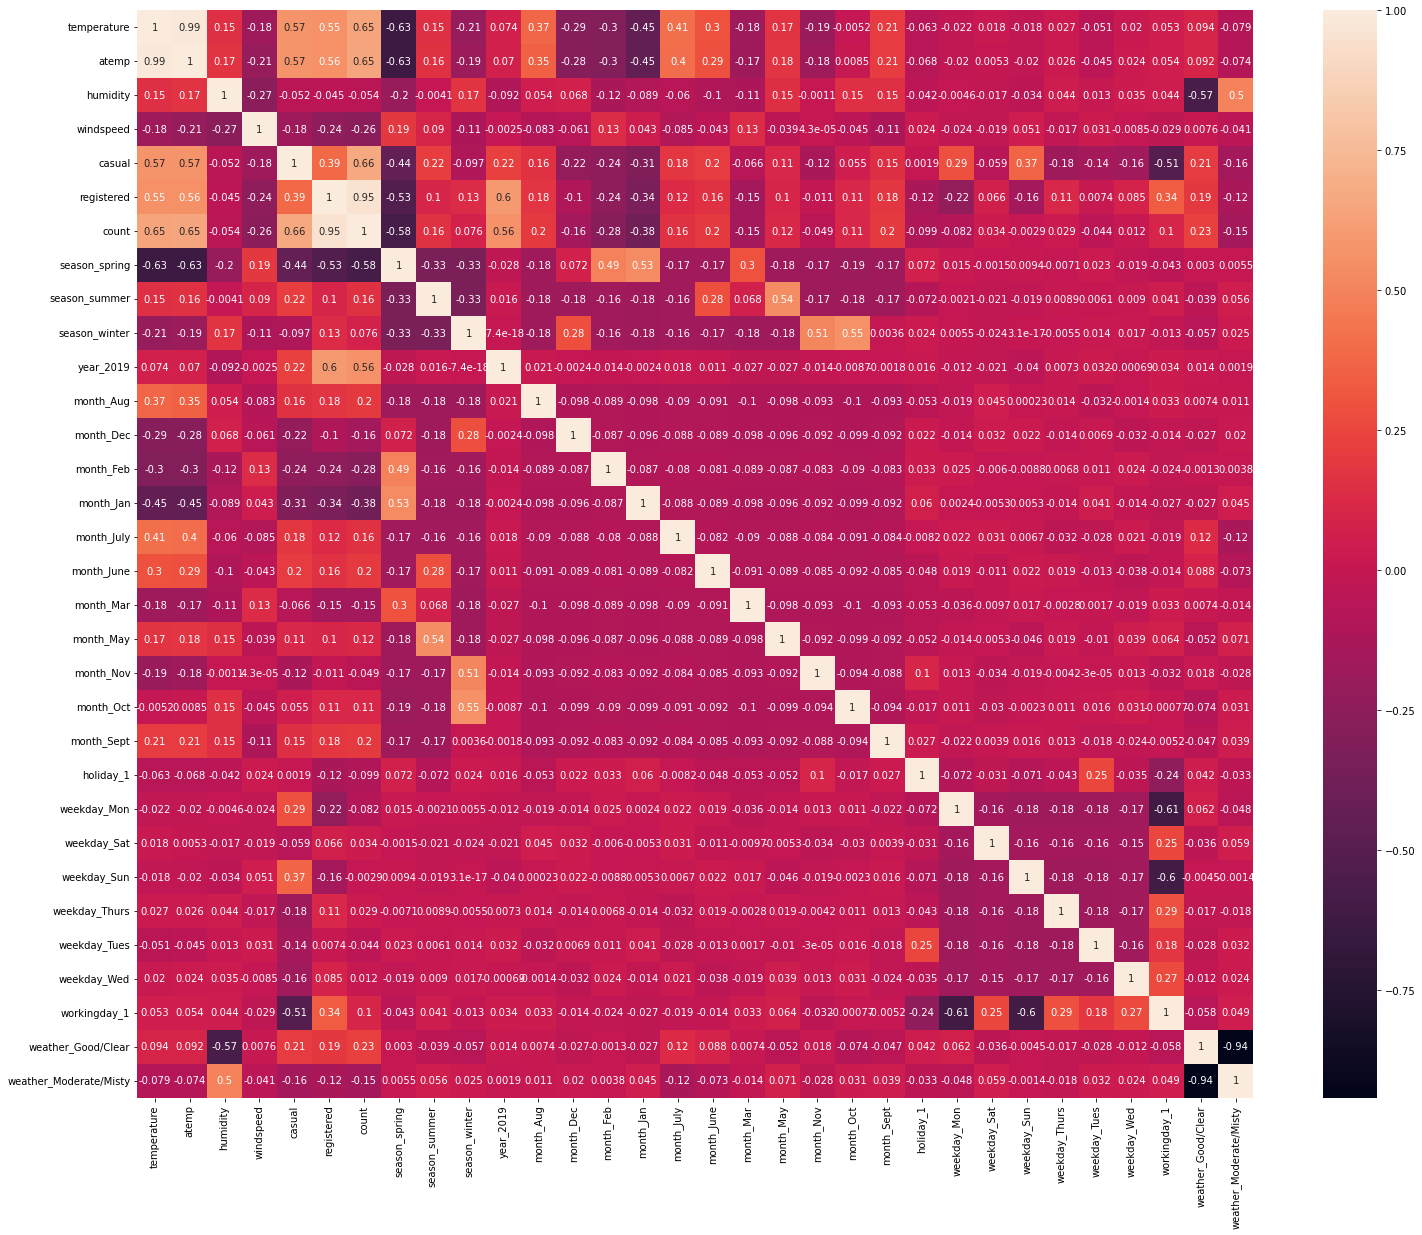

In [148]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = [25,20])
sns.heatmap(bike_train.corr(),annot =True)
plt.show()

## Model Building

In [149]:
# Dividing training set into X_train and y_train sets for the model building

X_train = bike_train
y_train = bike_train.pop('count')

print(X_train.shape)
print(y_train.shape)

(584, 31)
(584,)


In [150]:
#importing RFE library for feature selection 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [151]:
# using RFE for feature selection and  limiting to selecton to 15 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [152]:
#creating a list of features selected by RFE

list(zip(X_train, rfe.support_, rfe.ranking_))

[('temperature', True, 1),
 ('atemp', True, 1),
 ('humidity', False, 7),
 ('windspeed', False, 9),
 ('casual', True, 1),
 ('registered', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', False, 12),
 ('year_2019', True, 1),
 ('month_Aug', False, 2),
 ('month_Dec', True, 1),
 ('month_Feb', False, 14),
 ('month_Jan', False, 17),
 ('month_July', True, 1),
 ('month_June', False, 10),
 ('month_Mar', False, 13),
 ('month_May', False, 16),
 ('month_Nov', True, 1),
 ('month_Oct', True, 1),
 ('month_Sept', False, 6),
 ('holiday_1', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 4),
 ('weekday_Thurs', False, 15),
 ('weekday_Tues', False, 11),
 ('weekday_Wed', True, 1),
 ('workingday_1', False, 3),
 ('weather_Good/Clear', True, 1),
 ('weather_Moderate/Misty', True, 1)]

In [153]:
#creating a list of features selected by RFE

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['temperature', 'atemp', 'casual', 'registered', 'season_spring',
       'year_2019', 'month_Dec', 'month_July', 'month_Nov', 'month_Oct',
       'holiday_1', 'weekday_Sat', 'weekday_Wed', 'weather_Good/Clear',
       'weather_Moderate/Misty'],
      dtype='object')

In [154]:
# feature which are chosen by RFE during feature selection

X_train.columns[~rfe.support_]

Index(['humidity', 'windspeed', 'season_summer', 'season_winter', 'month_Aug',
       'month_Feb', 'month_Jan', 'month_June', 'month_Mar', 'month_May',
       'month_Sept', 'weekday_Mon', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'workingday_1'],
      dtype='object')

In [155]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,temperature,atemp,casual,registered,season_spring,year_2019,month_Dec,month_July,month_Nov,month_Oct,holiday_1,weekday_Sat,weekday_Wed,weather_Good/Clear,weather_Moderate/Misty
367,0.113228,0.061963,89,2147,1,1,0,0,0,0,0,0,1,1,0
648,0.468352,0.462175,834,6736,0,1,0,0,0,1,0,0,0,1,0
44,0.443431,0.419099,208,1705,1,0,0,0,0,0,0,0,0,1,0
705,0.326094,0.318824,349,4659,0,1,1,0,0,0,0,1,0,0,1
379,0.133996,0.108365,284,2027,1,1,0,0,0,0,0,0,0,1,0


## OUR MODELS:

In [156]:
# importing statsmodels to add constant/intercept.

import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.140e+31
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:39:32   Log-Likelihood:                 20354.
No. Observations:                 584   AIC:                        -4.068e+04
Df Residuals:                     568   BIC:                        -4.061e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0025   5.84e-17  -4.33e+13      0.000      -0.003      -0.003
temperature            -2.776e-16   2.48e-16     -1.119      0.264   -7.65e-16     2.1e-16
atemp                           0   2.61e-16          0      1.000   -5.12e-16    5.12e-16
casual                     0.0001   1.54e-20   7.49e+15      0.000       0.000       0.000
registered                 0.0001   9.78e-21   1.18e+16      0.000       0.000       0.000
season_spring            4.51e-17   2.87e-17      1.573      0.116   -1.12e-17    1.01e-16
year_2019               6.245e-17   2.39e-17      2.616      0.009    1.56e-17    1.09e-16
month_Dec               5.204e-17   2.95e-17      1.766      0.078   -5.82e-18     1.1e-16
month_July              6.939e-18    3.2e-17      0.217      0.828   -5.59e-17    6.98e-17
month_Nov               1.249e-16   3.25e-17      3.839      0.000     6.1e-17    1.89e-16
month_Oct               2.082e-17   2.84e-17      0.733      0.464    -3.5e-17    7.66e-17
holiday_1              -4.857e-17    4.7e-17     -1.034      0.302   -1.41e-16    4.37e-17
weekday_Sat            -2.429e-17   2.35e-17     -1.034      0.301   -7.04e-17    2.18e-17
weekday_Wed             2.776e-17    2.3e-17      1.208      0.227   -1.74e-17    7.29e-17
weather_Good/Clear       1.11e-16   5.23e-17      2.124      0.034    8.37e-18    2.14e-16
weather_Moderate/Misty  1.015e-16   5.05e-17      2.008      0.045     2.2e-18    2.01e-16
==============================================================================
Omnibus:                        2.857   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                2.427
Skew:                           0.050   Prob(JB):                        0.297
Kurtosis:                       2.701   Cond. No.                     1.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [157]:
# importing libraries to check the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,380.66
0,temperature,371.14
3,registered,27.54
13,weather_Good/Clear,16.22
14,weather_Moderate/Misty,7.63
5,year_2019,5.27
2,casual,4.98
4,season_spring,3.10
7,month_July,1.37
8,month_Nov,1.34


- removing feature - atemp due very high VIF values as all the p-values < 0.05.

In [158]:
 X_train_rfe2 = X_train_rfe.drop('atemp', axis = 1)

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.807e+30
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:44:24   Log-Likelihood:                 19304.
No. Observations:                 584   AIC:                        -3.858e+04
Df Residuals:                     569   BIC:                        -3.851e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0025   3.52e-16  -7.18e+12      0.000      -0.003      -0.003
temperature             3.192e-16   3.95e-16      0.808      0.419   -4.57e-16     1.1e-15
casual                     0.0001   9.26e-20   1.24e+15      0.000       0.000       0.000
registered                 0.0001   5.88e-20   1.96e+15      0.000       0.000       0.000
season_spring           -1.11e-16   1.73e-16     -0.642      0.521   -4.51e-16    2.29e-16
year_2019               8.674e-19   1.43e-16      0.006      0.995   -2.81e-16    2.83e-16
month_Dec              -6.072e-18   1.77e-16     -0.034      0.973   -3.54e-16    3.42e-16
month_July             -2.776e-17   1.93e-16     -0.144      0.886   -4.07e-16    3.52e-16
month_Nov               4.857e-17   1.96e-16      0.248      0.804   -3.37e-16    4.34e-16
month_Oct                1.18e-16   1.71e-16      0.691      0.490   -2.18e-16    4.53e-16
holiday_1              -2.082e-17   2.83e-16     -0.073      0.941   -5.77e-16    5.36e-16
weekday_Sat            -5.204e-17   1.41e-16     -0.369      0.712   -3.29e-16    2.25e-16
weekday_Wed                     0   1.39e-16          0      1.000   -2.72e-16    2.72e-16
weather_Good/Clear      3.469e-17   3.15e-16      0.110      0.912   -5.84e-16    6.53e-16
weather_Moderate/Misty  1.353e-16   3.04e-16      0.445      0.657   -4.63e-16    7.33e-16
==============================================================================
Omnibus:                       33.504   Durbin-Watson:                   0.466
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.478
Skew:                           0.214   Prob(JB):                     0.000264
Kurtosis:                       2.298   Cond. No.                     5.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,registered,27.31
0,temperature,18.44
12,weather_Good/Clear,16.16
13,weather_Moderate/Misty,7.57
4,year_2019,5.22
1,casual,4.97
3,season_spring,3.10
6,month_July,1.37
7,month_Nov,1.34
11,weekday_Wed,1.28


- removing feature - weekday_Wed due very high VIF values as all the p-values < 0.05.

In [161]:
X_train_rfe3 = X_train_rfe2.drop('weekday_Wed', axis = 1)

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.792e+31
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:47:42   Log-Likelihood:                 20170.
No. Observations:                 584   AIC:                        -4.031e+04
Df Residuals:                     570   BIC:                        -4.025e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0025   7.98e-17  -3.17e+13      0.000      -0.003      -0.003
temperature            -8.327e-17   8.95e-17     -0.931      0.352   -2.59e-16    9.24e-17
casual                     0.0001   2.05e-20   5.62e+15      0.000       0.000       0.000
registered                 0.0001   1.32e-20   8.69e+15      0.000       0.000       0.000
season_spring           1.596e-16   3.92e-17      4.073      0.000    8.26e-17    2.37e-16
year_2019               5.031e-17   3.25e-17      1.550      0.122   -1.34e-17    1.14e-16
month_Dec              -2.645e-17   4.01e-17     -0.659      0.510   -1.05e-16    5.24e-17
month_July             -8.327e-17   4.37e-17     -1.904      0.057   -1.69e-16    2.62e-18
month_Nov               2.082e-17   4.44e-17      0.469      0.639   -6.64e-17    1.08e-16
month_Oct               1.388e-17   3.87e-17      0.359      0.720   -6.21e-17    8.99e-17
holiday_1              -5.551e-17   6.42e-17     -0.865      0.387   -1.82e-16    7.05e-17
weekday_Sat             6.939e-18   3.14e-17      0.221      0.825   -5.46e-17    6.85e-17
weather_Good/Clear      2.082e-17   7.13e-17      0.292      0.770   -1.19e-16    1.61e-16
weather_Moderate/Misty -5.031e-17   6.89e-17     -0.731      0.465   -1.86e-16    8.49e-17
==============================================================================
Omnibus:                       45.217   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.934
Skew:                          -0.239   Prob(JB):                     4.69e-05
Kurtosis:                       2.231   Cond. No.                     5.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [162]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,registered,27.04
0,temperature,18.42
11,weather_Good/Clear,16.09
12,weather_Moderate/Misty,7.53
4,year_2019,5.21
1,casual,4.73
3,season_spring,3.10
6,month_July,1.37
7,month_Nov,1.34
5,month_Dec,1.24


- removing feature - weekday_Sat due very high VIF values as all the p-values < 0.05.

In [163]:
X_train_rfe4 = X_train_rfe3.drop('weekday_Sat', axis = 1)

# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.902e+31
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:58:25   Log-Likelihood:                 20155.
No. Observations:                 584   AIC:                        -4.028e+04
Df Residuals:                     571   BIC:                        -4.023e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0025   8.19e-17  -3.09e+13      0.000      -0.003      -0.003
temperature             1.249e-16   9.18e-17      1.361      0.174   -5.53e-17    3.05e-16
casual                     0.0001    2.1e-20   5.49e+15      0.000       0.000       0.000
registered                 0.0001   1.35e-20   8.53e+15      0.000       0.000       0.000
season_spring           2.082e-16   4.02e-17      5.180      0.000    1.29e-16    2.87e-16
year_2019               4.857e-17   3.32e-17      1.465      0.143   -1.65e-17    1.14e-16
month_Dec               5.204e-17   4.12e-17      1.264      0.207   -2.88e-17    1.33e-16
month_July              3.816e-17   4.48e-17      0.851      0.395   -4.99e-17    1.26e-16
month_Nov                1.11e-16   4.56e-17      2.437      0.015    2.16e-17       2e-16
month_Oct               8.327e-17   3.97e-17      2.099      0.036    5.36e-18    1.61e-16
holiday_1               -4.51e-17   6.59e-17     -0.685      0.494   -1.74e-16    8.42e-17
weather_Good/Clear      1.249e-16   7.31e-17      1.708      0.088   -1.88e-17    2.69e-16
weather_Moderate/Misty  1.821e-16   7.06e-17      2.580      0.010    4.35e-17    3.21e-16
==============================================================================
Omnibus:                       56.849   Durbin-Watson:                   0.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.333
Skew:                          -0.667   Prob(JB):                     4.00e-20
Kurtosis:                       4.376   Cond. No.                     5.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,registered,26.64
0,temperature,18.40
10,weather_Good/Clear,16.09
11,weather_Moderate/Misty,7.51
4,year_2019,5.16
1,casual,4.72
3,season_spring,3.09
6,month_July,1.37
7,month_Nov,1.34
5,month_Dec,1.24


- removing feature - weather_Moderate/Misty	

In [165]:
X_train_rfe5 = X_train_rfe4.drop('weather_Moderate/Misty', axis = 1)

# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.535e+31
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:08:02   Log-Likelihood:                 19856.
No. Observations:                 584   AIC:                        -3.969e+04
Df Residuals:                     572   BIC:                        -3.964e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0025   9.41e-17  -2.69e+13      0.000      -0.003      -0.003
temperature        -4.163e-17   1.51e-16     -0.276      0.782   -3.38e-16    2.54e-16
casual                 0.0001   3.42e-20   3.36e+15      0.000       0.000       0.000
registered             0.0001   2.12e-20   5.43e+15      0.000       0.000       0.000
season_spring      -3.469e-18   6.62e-17     -0.052      0.958   -1.33e-16    1.27e-16
year_2019           9.021e-17   5.35e-17      1.686      0.092   -1.49e-17    1.95e-16
month_Dec          -6.202e-17   6.86e-17     -0.905      0.366   -1.97e-16    7.26e-17
month_July         -4.163e-17   7.46e-17     -0.558      0.577   -1.88e-16    1.05e-16
month_Nov          -5.551e-17   7.58e-17     -0.732      0.464   -2.04e-16    9.34e-17
month_Oct          -4.857e-17   6.51e-17     -0.746      0.456   -1.76e-16    7.93e-17
holiday_1           3.469e-17   1.09e-16      0.317      0.751    -1.8e-16    2.49e-16
weather_Good/Clear  7.459e-17   3.98e-17      1.876      0.061   -3.51e-18    1.53e-16
==============================================================================
Omnibus:                       23.573   Durbin-Watson:                   0.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.583
Skew:                           0.011   Prob(JB):                      0.00503
Kurtosis:                       2.341   Cond. No.                     4.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [166]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,registered,22.10
0,temperature,15.43
4,year_2019,4.83
1,casual,4.54
10,weather_Good/Clear,3.31
3,season_spring,1.48
6,month_July,1.35
8,month_Oct,1.19
7,month_Nov,1.18
5,month_Dec,1.14


- removing feature - registered

In [167]:
X_train_rfe6 = X_train_rfe5.drop('registered', axis = 1)

# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe6)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     270.5
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          1.36e-209
Time:                        02:13:50   Log-Likelihood:                 551.34
No. Observations:                 584   AIC:                            -1081.
Df Residuals:                     573   BIC:                            -1033.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1334      0.021      6.480      0.000       0.093       0.174
temperature            0.3555      0.031     11.542      0.000       0.295       0.416
casual              7.814e-05   7.61e-06     10.268      0.000    6.32e-05    9.31e-05
season_spring         -0.1234      0.014     -8.748      0.000      -0.151      -0.096
year_2019              0.2161      0.008     26.621      0.000       0.200       0.232
month_Dec              0.0150      0.016      0.965      0.335      -0.016       0.046
month_July            -0.0739      0.017     -4.439      0.000      -0.107      -0.041
month_Nov              0.0148      0.017      0.863      0.389      -0.019       0.049
month_Oct              0.0470      0.015      3.209      0.001       0.018       0.076
holiday_1             -0.1052      0.024     -4.307      0.000      -0.153      -0.057
weather_Good/Clear     0.0743      0.008      8.768      0.000       0.058       0.091
==============================================================================
Omnibus:                      130.368   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              353.091
Skew:                          -1.101   Prob(JB):                     2.12e-77
Kurtosis:                       6.108   Cond. No.                     1.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temperature,5.41
1,casual,4.39
9,weather_Good/Clear,2.86
3,year_2019,2.16
2,season_spring,1.41
5,month_July,1.27
6,month_Nov,1.13
7,month_Oct,1.13
4,month_Dec,1.10
8,holiday_1,1.05


- removing feature - casual

In [170]:
X_train_rfe7 = X_train_rfe6.drop('casual', axis = 1)

# Add a constant
X_train_lm7 = sm.add_constant(X_train_rfe7)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     244.3
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          7.47e-190
Time:                        02:15:00   Log-Likelihood:                 502.03
No. Observations:                 584   AIC:                            -984.1
Df Residuals:                     574   BIC:                            -940.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1381      0.022      6.169      0.000       0.094       0.182
temperature            0.4472      0.032     13.957      0.000       0.384       0.510
season_spring         -0.1483      0.015     -9.819      0.000      -0.178      -0.119
year_2019              0.2353      0.009     27.402      0.000       0.218       0.252
month_Dec             -0.0030      0.017     -0.180      0.857      -0.036       0.030
month_July            -0.0849      0.018     -4.698      0.000      -0.120      -0.049
month_Nov             -0.0033      0.019     -0.176      0.860      -0.040       0.033
month_Oct              0.0489      0.016      3.071      0.002       0.018       0.080
holiday_1             -0.0914      0.027     -3.447      0.001      -0.143      -0.039
weather_Good/Clear     0.0933      0.009     10.372      0.000       0.076       0.111
==============================================================================
Omnibus:                      132.153   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.735
Skew:                          -1.004   Prob(JB):                    2.74e-107
Kurtosis:                       7.017   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temperature,3.42
8,weather_Good/Clear,2.71
2,year_2019,2.04
1,season_spring,1.33
4,month_July,1.26
6,month_Oct,1.13
5,month_Nov,1.12
3,month_Dec,1.09
7,holiday_1,1.05


- removing feature - month_dec

In [174]:
X_train_rfe8 = X_train_rfe7.drop('month_Dec', axis = 1)

# Add a constant
X_train_lm8 = sm.add_constant(X_train_rfe8)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     275.3
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          4.43e-191
Time:                        02:17:45   Log-Likelihood:                 502.01
No. Observations:                 584   AIC:                            -986.0
Df Residuals:                     575   BIC:                            -946.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1363      0.020      6.778      0.000       0.097       0.176
temperature            0.4495      0.029     15.307      0.000       0.392       0.507
season_spring         -0.1476      0.014    -10.182      0.000      -0.176      -0.119
year_2019              0.2352      0.009     27.430      0.000       0.218       0.252
month_July            -0.0850      0.018     -4.718      0.000      -0.120      -0.050
month_Nov             -0.0024      0.018     -0.132      0.895      -0.037       0.033
month_Oct              0.0495      0.016      3.173      0.002       0.019       0.080
holiday_1             -0.0916      0.026     -3.461      0.001      -0.144      -0.040
weather_Good/Clear     0.0932      0.009     10.379      0.000       0.076       0.111
==============================================================================
Omnibus:                      132.237   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.627
Skew:                          -1.005   Prob(JB):                    2.89e-107
Kurtosis:                       7.015   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temperature,3.42
7,weather_Good/Clear,2.69
2,year_2019,2.02
1,season_spring,1.32
3,month_July,1.26
5,month_Oct,1.12
4,month_Nov,1.11
6,holiday_1,1.05


In [177]:
X_train_rfe9 = X_train_rfe8.drop('month_Nov', axis = 1)

# Add a constant
X_train_lm9 = sm.add_constant(X_train_rfe9)

# Create a first fitted model
lr9 = sm.OLS(y_train, X_train_lm9).fit()

lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     315.2
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          2.43e-192
Time:                        02:20:37   Log-Likelihood:                 502.00
No. Observations:                 584   AIC:                            -988.0
Df Residuals:                     576   BIC:                            -953.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1351      0.018      7.559      0.000       0.100       0.170
temperature            0.4511      0.027     16.799      0.000       0.398       0.504
season_spring         -0.1468      0.013    -11.208      0.000      -0.172      -0.121
year_2019              0.2352      0.009     27.453      0.000       0.218       0.252
month_July            -0.0851      0.018     -4.728      0.000      -0.120      -0.050
month_Oct              0.0499      0.015      3.274      0.001       0.020       0.080
holiday_1             -0.0920      0.026     -3.504      0.000      -0.144      -0.040
weather_Good/Clear     0.0932      0.009     10.397      0.000       0.076       0.111
==============================================================================
Omnibus:                      132.226   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.341
Skew:                          -1.005   Prob(JB):                    3.34e-107
Kurtosis:                       7.014   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe9.values, i) for i in range(X_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temperature,3.42
6,weather_Good/Clear,2.62
2,year_2019,2.00
1,season_spring,1.29
3,month_July,1.24
4,month_Oct,1.11
5,holiday_1,1.03


**Model 9 coefficient values**

- const = 0.1351
- temperature	= 0.4511	
- season_spring = -0.1468
- month_July = -0.0851
- year_2019 = 0.2352
- month_Oct = 0.0499	
- holiday_1 = -0.0920

### The equation for best fitted line based on Model 9:


$Count = 0.1351 + (temp * 0.4511) - (season spring * 0.1468) - (month July * -0.0851) + (year 2019 * 0.2352) + (month Oct * 0.0499) - (holiday 1 * 0.0920)$

### Residual Analysis Of Training Data

In [179]:
y_train_pred = lr9.predict(X_train_lm9)

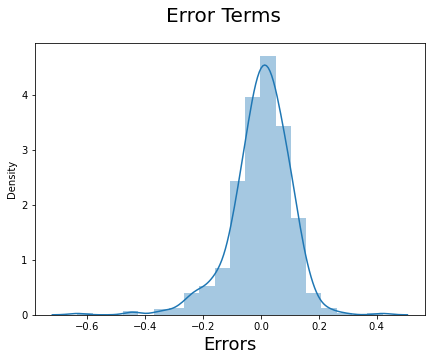

In [180]:
# residual calculations
res = y_train - y_train_pred

# Plot the histogram of the error terms

fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

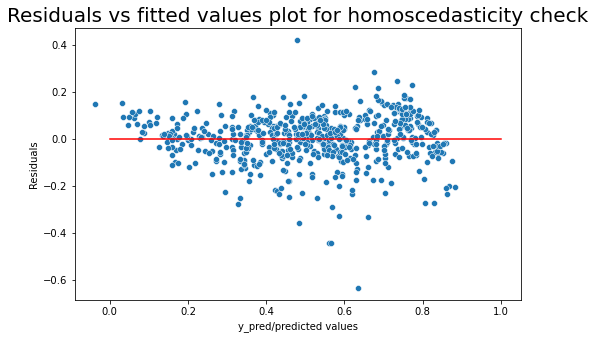

In [181]:
# Check for Homoscedasticity
plt.figure(figsize = [8,5])
p = sns.scatterplot(y_train_pred,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check', fontsize = 20)

- From the above plot, we can see that residuals have equal or almost equal variance across the regression line.

### MAKING PREDICTION USING FINAL MODEL


In [182]:
# Apply scaler() to all numeric variables in test dataset. 

bike_test[numericals] = scaler.transform(bike_test[numericals])
bike_test.head()

,temperature,atemp,humidity,windspeed,casual,registered,count,season_spring,season_summer,season_winter,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_1,weather_Good/Clear,weather_Moderate/Misty
184,0.831783,0.769660,0.657364,0.084219,3065,2978,0.692706,0,0,0,...,1,0,0,0,0,1,0,0,0,1
535,0.901354,0.842587,0.610133,0.153728,872,5339,0.712034,0,1,0,...,0,0,0,0,1,0,0,1,1,0
299,0.511964,0.496145,0.837699,0.334206,240,2419,0.303382,0,0,1,...,0,0,0,0,0,0,0,1,0,1
221,0.881625,0.795343,0.437098,0.339570,884,3896,0.547400,0,0,0,...,0,0,0,0,1,0,0,1,1,0
152,0.817246,0.741471,0.314298,0.537414,736,4232,0.569029,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [183]:
# variables after scaling the test data
bike_test.describe()

,temperature,atemp,humidity,windspeed,casual,registered,count,season_spring,season_summer,season_winter,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_1,weather_Good/Clear,weather_Moderate/Misty
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.00000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.569603,0.542752,0.635933,0.315127,858.561644,3660.40411,0.517368,0.226027,0.273973,0.219178,...,0.034247,0.102740,0.219178,0.116438,0.089041,0.123288,0.178082,0.746575,0.650685,0.315068
std,0.238088,0.222120,0.156357,0.161524,734.823356,1413.44801,0.212757,0.419697,0.447530,0.415114,...,0.182488,0.304664,0.415114,0.321854,0.285783,0.329899,0.383899,0.436469,0.478395,0.466142
min,0.046591,0.025950,0.261915,-0.042808,34.000000,472.00000,0.055683,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.359075,0.346732,0.534457,0.196160,305.500000,2782.25000,0.391251,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000
50%,0.560248,0.544652,0.614856,0.306383,705.500000,3683.00000,0.508916,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.801929,0.743337,0.730570,0.411976,1090.500000,4533.25000,0.649994,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,0.984424,0.980934,1.002146,0.800793,3410.000000,6640.00000,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [185]:
# Dividing test set into X_test and y_test sets for the model building

X_test = bike_test
y_test = bike_test.pop('count')

print(X_test.shape)
print(y_test.shape)


(146, 31)
(146,)


In [186]:
#Selecting the variables that were part of final model (Model 9).
col_test = X_train_rfe9.columns

X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_lm9 = sm.add_constant(X_test)

X_test_lm9.head()

,const,temperature,season_spring,year_2019,month_July,month_Oct,holiday_1,weather_Good/Clear
184,1.0,0.831783,0,0,1,0,1,0
535,1.0,0.901354,0,1,0,0,0,1
299,1.0,0.511964,0,0,0,1,0,0
221,1.0,0.881625,0,0,0,0,0,1
152,1.0,0.817246,0,0,0,0,0,1


In [187]:
# Making predictions using the final model (lr9)

y_test_pred = lr9.predict(X_test_lm9)

### Model Evaluation

Text(0, 0.5, 'y_test_pred')

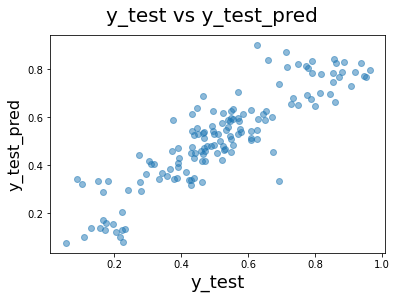

In [188]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 

- we can clearly see there is a relation between y_test and y_test_pred

### Residaul Analysis

In [189]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 77.93
Train data r^2 : 79.3


### Adjusted R^2 Value for TEST

In [190]:
# n for test data ,n1 for train data is number of rows
n = X_test.shape[0]
n1 = X_train_rfe8.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train_rfe8.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 76.81
Train data adjusted r^2 : 79.01


## FINAL RESULT COMPARISON: 

- Train data r^2 : 79.3
- Test data r^2 : 77.93

- Train data adjusted r^2 : 79.01
- Test data adjusted r^2 : 76.81


**As per our final Model, the below predictor variables influences bike booking :**
- temperature		
- season_spring
- month_July
- year_2019
- month_Oct 	
- holiday_1 